In [ ]:
from transformers import pipeline
import time
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
start = time.time()
sum_text=summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False)
end = time.time()
dic1 = {

            "Summary Text": sum_text[0]['summary_text'],
            "Length Before Summariztion": len(ARTICLE),
            "Length After Summarization": len(sum_text[0]['summary_text']),
            "Percentage Reduction": 100 - round((len(sum_text[0]['summary_text'])/len(ARTICLE))*100),
            "Time Taken": end-start
        }
print(dic1)



{'Summary Text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.', 'Length Before Summariztion': 2298, 'Length After Summarization': 262, 'Percentage Reduction': 89, 'Time Taken': 13.5820631980896}


In [ ]:
from transformers import pipeline
import time
summarizer = pipeline("summarization", model="Falconsai/text_summarization")

ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""
start = time.time()
sum_text=summarizer(ARTICLE, max_length=230, min_length=30, do_sample=False)
end = time.time()
dic2 = {

            "Summary Text": sum_text[0]['summary_text'],
            "Length Before Summariztion": len(ARTICLE),
            "Length After Summarization": len(sum_text[0]['summary_text']),
            "Percentage Reduction": 100 - round((len(sum_text[0]['summary_text'])/len(ARTICLE))*100),
            "Time Taken": end-start
        }
print(dic2)




Token indices sequence length is longer than the specified maximum sequence length for this model (528 > 512). Running this sequence through the model will result in indexing errors


{'Summary Text': 'Liana Barrientos, now 39, is facing two criminal counts of "offering a false instrument" Prosecutors said the marriages were part of an immigration scam . In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 .', 'Length Before Summariztion': 2298, 'Length After Summarization': 256, 'Percentage Reduction': 89, 'Time Taken': 3.388490915298462}


In [ ]:
!pip install sentencepiece

In [ ]:
import re
import time
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
WHITESPACE_HANDLER = lambda k: re.sub('\s+', ' ', re.sub('\n+', ' ', k.strip()))

article_text = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
2010 marriage license application, according to court documents.
Prosecutors said the marriages were part of an immigration scam.
On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
"""

model_name = "csebuetnlp/mT5_multilingual_XLSum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

input_ids = tokenizer(
    [WHITESPACE_HANDLER(article_text)],
    return_tensors="pt",
    padding="max_length",
    truncation=True,
    max_length=512
)["input_ids"]

output_ids = model.generate(
    input_ids=input_ids,
    max_length=130,
    no_repeat_ngram_size=2,
    num_beams=4
)[0]
start = time.time()
summary = tokenizer.decode(
    output_ids,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)
end=time.time()
dic3 = {

            "Summary Text": summary,
            "Length Before Summariztion": len(article_text),
            "Length After Summarization": len(summary),
            "Percentage Reduction": 100 - round((len(sum_text[0]['summary_text'])/len(ARTICLE))*100),
            "Time Taken": end-start
        }
print(dic3)


/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


{'Summary Text': 'A woman has pleaded not guilty to making false statements about her marriage.', 'Length Before Summariztion': 2298, 'Length After Summarization': 77, 'Percentage Reduction': 89, 'Time Taken': 0.00022077560424804688}


In [ ]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=2135ac48e747b9bc1e35ac45061abcb0140648e01a2d8f3b46ad18fd42d49ba3
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer

# Your generated summaries
#bart
summary_model1 = """Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men."""
#falconsai
summary_model2 = """Liana Barrientos, now 39, is facing two criminal counts of "offering a false instrument" Prosecutors said the marriages were part of an immigration scam . In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 ."""
summary_model3 = "A woman has pleaded not guilty to making false statements about her marriage."

# Your reference summaries (ground truth)
reference_summary = """Liana Barrientos, now 39, faced charges related to multiple marriages forming an immigration scam. She had ten marriages, nine between 1999 and 2002, some occurring within weeks. She allegedly made false statements on a marriage license in 2010. Barrientos is accused of being married to multiple men simultaneously, with some husbands using the marriages for immigration purposes. The case involves individuals from "red-flagged" countries, and one husband was deported due to a Joint Terrorism Task Force investigation. If convicted, Barrientos could face up to four years in prison."""

# Initialize the Rouge Scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores for each model's summary
scores_model1 = scorer.score(reference_summary, summary_model1)
scores_model2 = scorer.score(reference_summary, summary_model2)
scores_model3 = scorer.score(reference_summary, summary_model3)

# Print ROUGE scores
print("Model 1 ROUGE Scores:", scores_model1)
print("Model 2 ROUGE Scores:", scores_model2)
print("Model 3 ROUGE Scores:", scores_model3)


Model 1 ROUGE Scores: {'rouge1': Score(precision=0.5957446808510638, recall=0.3146067415730337, fmeasure=0.4117647058823529), 'rouge2': Score(precision=0.15217391304347827, recall=0.07954545454545454, fmeasure=0.10447761194029852), 'rougeL': Score(precision=0.3404255319148936, recall=0.1797752808988764, fmeasure=0.2352941176470588)}
Model 2 ROUGE Scores: {'rouge1': Score(precision=0.5952380952380952, recall=0.2808988764044944, fmeasure=0.3816793893129771), 'rouge2': Score(precision=0.21951219512195122, recall=0.10227272727272728, fmeasure=0.13953488372093026), 'rougeL': Score(precision=0.35714285714285715, recall=0.16853932584269662, fmeasure=0.22900763358778622)}
Model 3 ROUGE Scores: {'rouge1': Score(precision=0.38461538461538464, recall=0.056179775280898875, fmeasure=0.09803921568627451), 'rouge2': Score(precision=0.08333333333333333, recall=0.011363636363636364, fmeasure=0.02), 'rougeL': Score(precision=0.3076923076923077, recall=0.0449438202247191, fmeasure=0.0784313725490196)}


In [ ]:
# Creating DataFrame
import pandas as pd

#  ROUGE scores
model1_rouge = {
    'Model': 'Model 1',
    'ROUGE1 Precision': 0.5957446808510638,
    'ROUGE1 Recall': 0.3146067415730337,
    'ROUGE1 F-measure': 0.4117647058823529,
    'ROUGE2 Precision': 0.15217391304347827,
    'ROUGE2 Recall': 0.07954545454545454,
    'ROUGE2 F-measure': 0.13953488372093026,
    'ROUGEL Precision': 0.3404255319148936,
    'ROUGEL Recall': 0.1797752808988764,
    'ROUGEL F-measure': 0.2352941176470588
}

model2_rouge = {
    'Model': 'Model 2',
    'ROUGE1 Precision': 0.5952380952380952,
    'ROUGE1 Recall': 0.2808988764044944,
    'ROUGE1 F-measure': 0.3816793893129771,
    'ROUGE2 Precision': 0.13951219512195122,
    'ROUGE2 Recall': 0.06927272727272728,
    'ROUGE2 F-measure': 0.10447761194029852,
    'ROUGEL Precision': 0.35714285714285715,
    'ROUGEL Recall': 0.16853932584269662,
    'ROUGEL F-measure': 0.22900763358778622
}

model3_rouge = {
    'Model': 'Model 3',
    'ROUGE1 Precision': 0.38461538461538464,
    'ROUGE1 Recall': 0.056179775280898875,
    'ROUGE1 F-measure': 0.09803921568627451,
    'ROUGE2 Precision': 0.08333333333333333,
    'ROUGE2 Recall': 0.011363636363636364,
    'ROUGE2 F-measure': 0.02,
    'ROUGEL Precision': 0.3076923076923077,
    'ROUGEL Recall': 0.0449438202247191,
    'ROUGEL F-measure': 0.0784313725490196
}

# Creating DataFrame
df = pd.DataFrame([model1_rouge, model2_rouge, model3_rouge])

# Printing the DataFrame
print(df)




     Model  ROUGE1 Precision  ROUGE1 Recall  ROUGE1 F-measure  \
0  Model 1          0.595745       0.314607          0.411765   
1  Model 2          0.595238       0.280899          0.381679   
2  Model 3          0.384615       0.056180          0.098039   

   ROUGE2 Precision  ROUGE2 Recall  ROUGE2 F-measure  ROUGEL Precision  \
0          0.152174       0.079545          0.139535          0.340426   
1          0.139512       0.069273          0.104478          0.357143   
2          0.083333       0.011364          0.020000          0.307692   

   ROUGEL Recall  ROUGEL F-measure  
0       0.179775          0.235294  
1       0.168539          0.229008  
2       0.044944          0.078431  


In [ ]:
import pandas as pd

# Dictionaries with model names
dic1 = {
    'Model': 'facebook/bart-large-cnn',
    'Summary Text': 'Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002. She is believed to still be married to four men.',
    'Length Before Summarization': 2298,
    'Length After Summarization': 262,
    'Percentage Reduction': 89,
    'Time Taken': 13.5820631980896
}

dic2 = {
    'Model': 'Falconsai/text_summarization',
    'Summary Text': 'Liana Barrientos, now 39, is facing two criminal counts of "offering a false instrument" Prosecutors said the marriages were part of an immigration scam . In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 .',
    'Length Before Summarization': 2298,
    'Length After Summarization': 256,
    'Percentage Reduction': 89,
    'Time Taken': 3.388490915298462
}

dic3 = {
    'Model': 'csebuetnlp/mT5_multilingual_XLSum',
    'Summary Text': 'A woman has pleaded not guilty to making false statements about her marriage.',
    'Length Before Summarization': 2298,
    'Length After Summarization': 77,
    'Percentage Reduction': 89,
    'Time Taken': 0.00022077560424804688
}

# Creating DataFrame
df = pd.DataFrame([dic1, dic2, dic3])

# Reordering columns for better readability (if needed)
df = df[['Model', 'Summary Text', 'Length Before Summarization', 'Length After Summarization', 'Percentage Reduction', 'Time Taken']]

# Printing the DataFrame
print(df)


                               Model  \
0            facebook/bart-large-cnn   
1       Falconsai/text_summarization   
2  csebuetnlp/mT5_multilingual_XLSum   

                                        Summary Text  \
0  Liana Barrientos, 39, is charged with two coun...   
1  Liana Barrientos, now 39, is facing two crimin...   
2  A woman has pleaded not guilty to making false...   

   Length Before Summarization  Length After Summarization  \
0                         2298                         262   
1                         2298                         256   
2                         2298                          77   

   Percentage Reduction  Time Taken  
0                    89   13.582063  
1                    89    3.388491  
2                    89    0.000221  


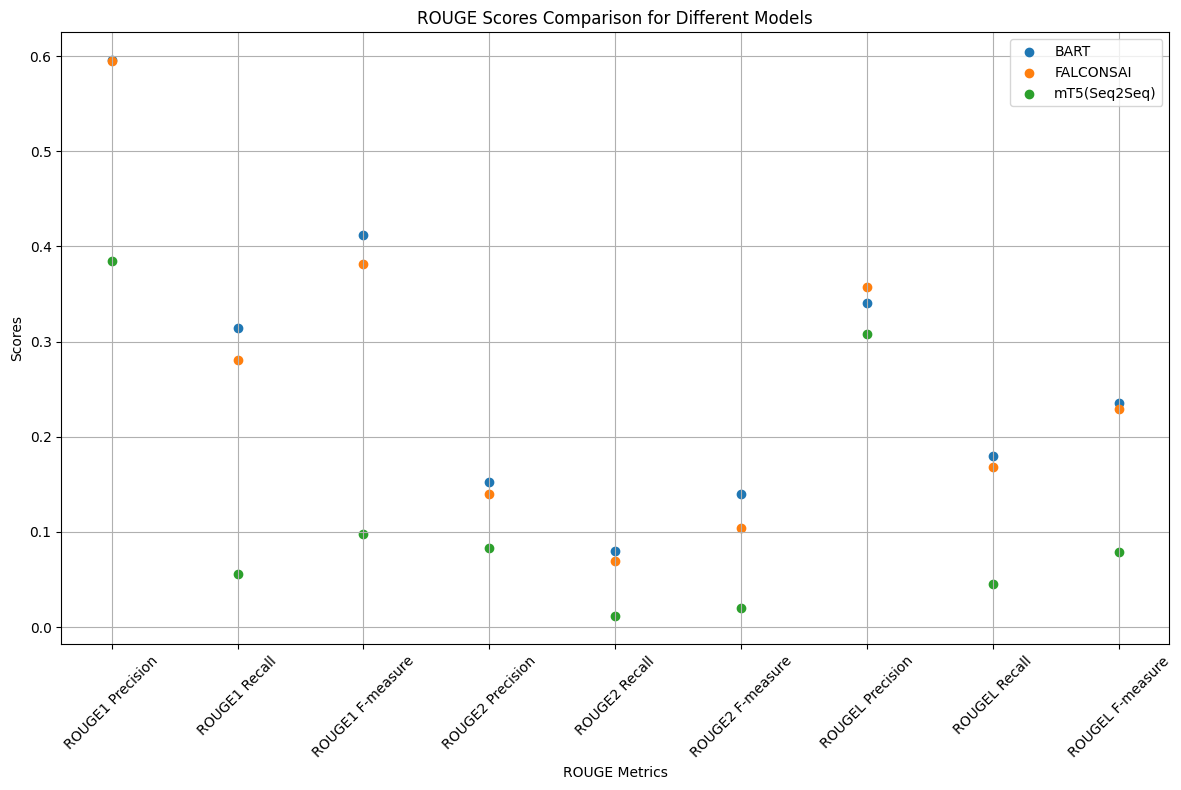

In [ ]:
import matplotlib.pyplot as plt

# ROUGE scores for each model and metric
models = ['BART', 'FALCONSAI', 'mT5(Seq2Seq)']
metrics = ['ROUGE1 Precision', 'ROUGE1 Recall', 'ROUGE1 F-measure',
           'ROUGE2 Precision', 'ROUGE2 Recall', 'ROUGE2 F-measure',
           'ROUGEL Precision', 'ROUGEL Recall', 'ROUGEL F-measure']

# Create scatter plot for each metric and model
plt.figure(figsize=(12, 8))

for i, model in enumerate(models):
    model_rouge = [model1_rouge, model2_rouge, model3_rouge][i]
    plt.scatter(metrics, [model_rouge[metric] for metric in metrics], label=model)

plt.xlabel('ROUGE Metrics')
plt.ylabel('Scores')
plt.title('ROUGE Scores Comparison for Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
